## CIFAR10 이미지분류 with ImageDataGenerator

### 1. 기본 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import os

### 2. 데이터 처리

#### 2-1. 데이터 확인 : 데이터 이미지 그려보기

(32, 32, 3)

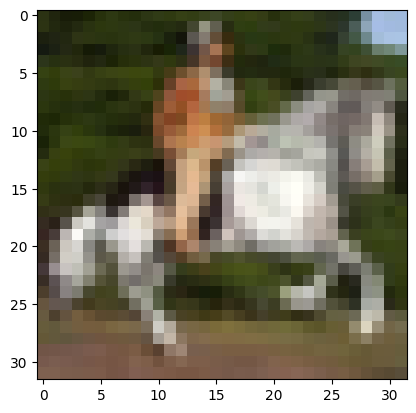

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\hanjieun_2\Desktop\kaggle_dataset\CNN\cifar10\cifar10\train\horse\4612.png")
# 이미지 그려보기
plt.imshow(img)

# 이미지를 numpy 배열로 변환해 크기 알아보기
np_img = np.array(img)
np_img.shape

#### 2-2. 기본 경로와 변수 설정

In [3]:
# 학습용 데이터와 평가용 데이터의 경로 지정
train_dir = r"C:\Users\hanjieun_2\Desktop\kaggle_dataset\CNN\cifar10\cifar10\train"
test_dir = r"C:\Users\hanjieun_2\Desktop\kaggle_dataset\CNN\cifar10\cifar10\test"

os.listdir(train_dir)   # 학습용 데이터 경로의 파일 또는 폴더 확인

bs = 16                 # batch_size 설정
input_sh = (32,32,3)    # 데이터 형태 설정

#### 2-3. 데이터 불러오기

In [4]:
# ImageDataGenerator호출
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen 정의. 데이터 값의 크기를 255로 나눔으로써 데이터 전처리 실행
datagen = ImageDataGenerator(rescale = 1./255)


# train 정의: flow_from_directory로 학습용 데이터를 batch_size 단위로 로딩
train = datagen.flow_from_directory(train_dir, batch_size=bs, 
                                    target_size=(32,32), class_mode='categorical')

# test 정의 : flow_from_directory로 평가용 데이터를 batch_size 단위로 로딩
test = datagen.flow_from_directory(test_dir, batch_size=bs,
                                   target_size=(32,32), class_mode = 'categorical',
                                   shuffle=False)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


#### 2-4. DataGen 확인

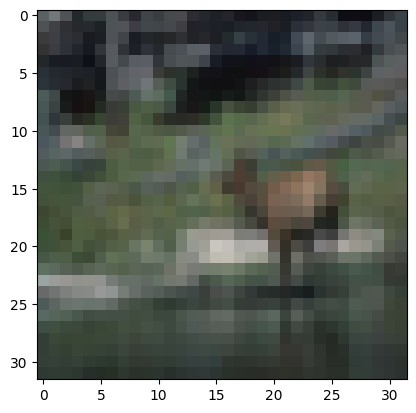

(32, 32, 3) [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
x,y = train.next() # 데이터의 다음 배치를 요청
x.shape

# 로딩한 이미지 그리기
for i in range(0,bs):
    plt.imshow((x[i]*255).astype('int')) # datagen에서 255를 나누었으므로 다시 곱해서 정수화
    plt.show()
    print(x[i].shape, y[i])
    break

### 3. CNN Model 설정

#### 3-1. CNN 라이브러리 호출

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#### 3-2. 모델 설정

In [7]:
# 모델 생성
model = Sequential()

# 1. Convolution Layer
# 3x3의 filter를 스캔하여 feature map을 8개 만든후, activation=relu를 적용해 activation map 생성
model.add(Conv2D(8, (3,3), activation='relu', input_shape= input_sh))

# 2. Pooling Layer
model.add(MaxPooling2D())

# 3. Convolution Layer
# 3x3의 filter를 스캔하여 feature map을 8개 만든후, activation=relu를 적용해 activation map 생성
model.add(Conv2D(8, (3,3), activation='relu'))

# 4. Pooling Layer
model.add(MaxPooling2D())

# 5. Convolution Layer
# feature map을 증가시키는 이유는 복잡한 특징을 수행하기 위함. 
# CNN에서 레이어를 통과할 때마다 feature map을 증가시키는 것이 일반적. 
model.add(Conv2D(16, (3,3), activation='relu'))

# 6. Pooling Layer
model.add(MaxPooling2D())

#---보통 CNN Layer(Convolution Layer + Pooling Layer)는 3번 반복한다.---

# 7. FC Layer
model.add(Flatten())

model.add(Dropout(0.5)) # 50%확률로 뉴런이 제거될 수 있음.(과적합 방지용)

# 8. fully connected laye로, 이전의 특성을 입력으로 받아들여 출력을 생성
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          1168      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0

### 4. 모델 생성

#### 4-1. 모델 compile : loss, optimizer, metrics 설정

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics='acc')

#### 4-2. 모델 학습 : data generator로 데이터를 불러오기 때문에 레이블 지정이 따로 없다.

In [9]:
hist = model.fit(train, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 448s 143ms/step - loss: 1.9314 - acc: 0.2726
Epoch 2/5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.7339 - acc: 0.3512
Epoch 3/5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.6567 - acc: 0.3864
Epoch 4/5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.6161 - acc: 0.3999
Epoch 5/5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.5859 - acc: 0.4168


### 5. 결과 평가

In [10]:
model.evaluate(test)

625/625 [==============================] - 86s 137ms/step - loss: 1.4359 - acc: 0.4750


[1.4358880519866943, 0.4749999940395355]

> 손실률이 높게 나온 것 같다.. 더 좋은 모델이 있을 것 같다.

> 